First cluster


In [10]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2
from model import *
from load_data import *
from utils import *

96.9% of data retained after cleaning


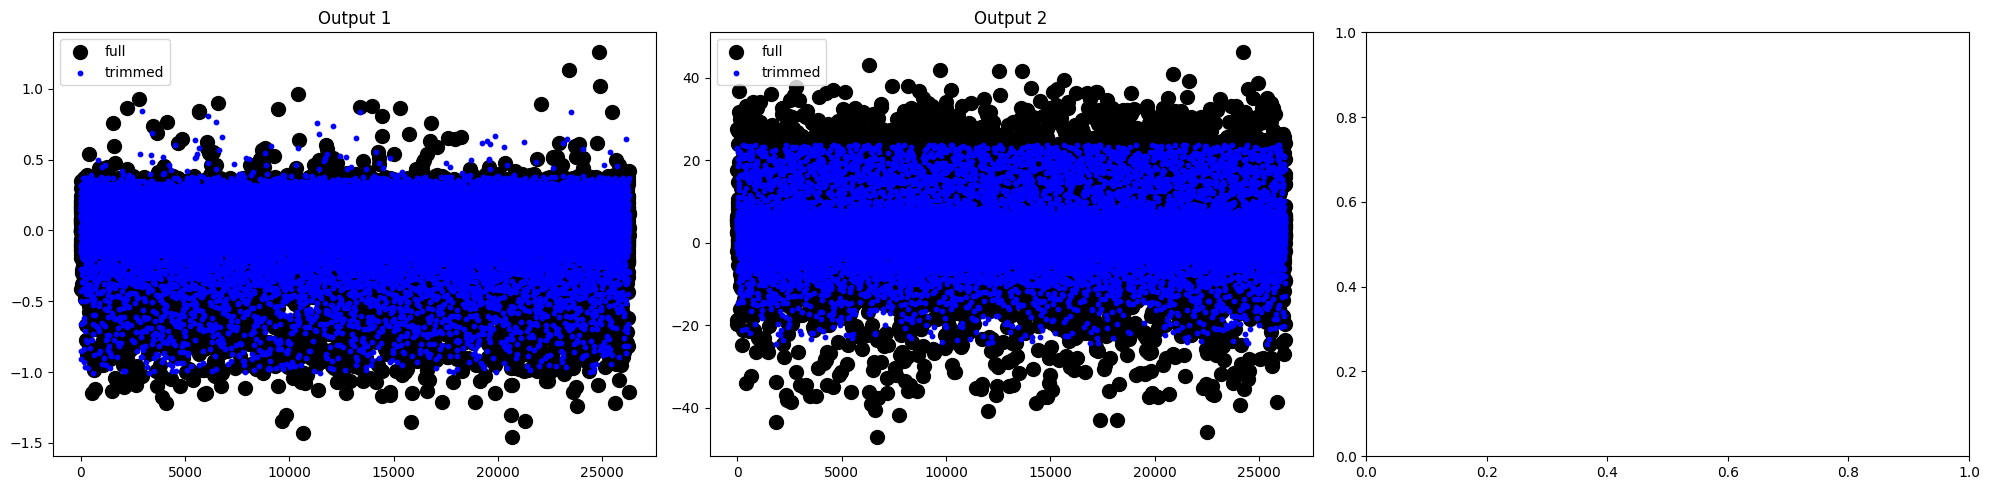

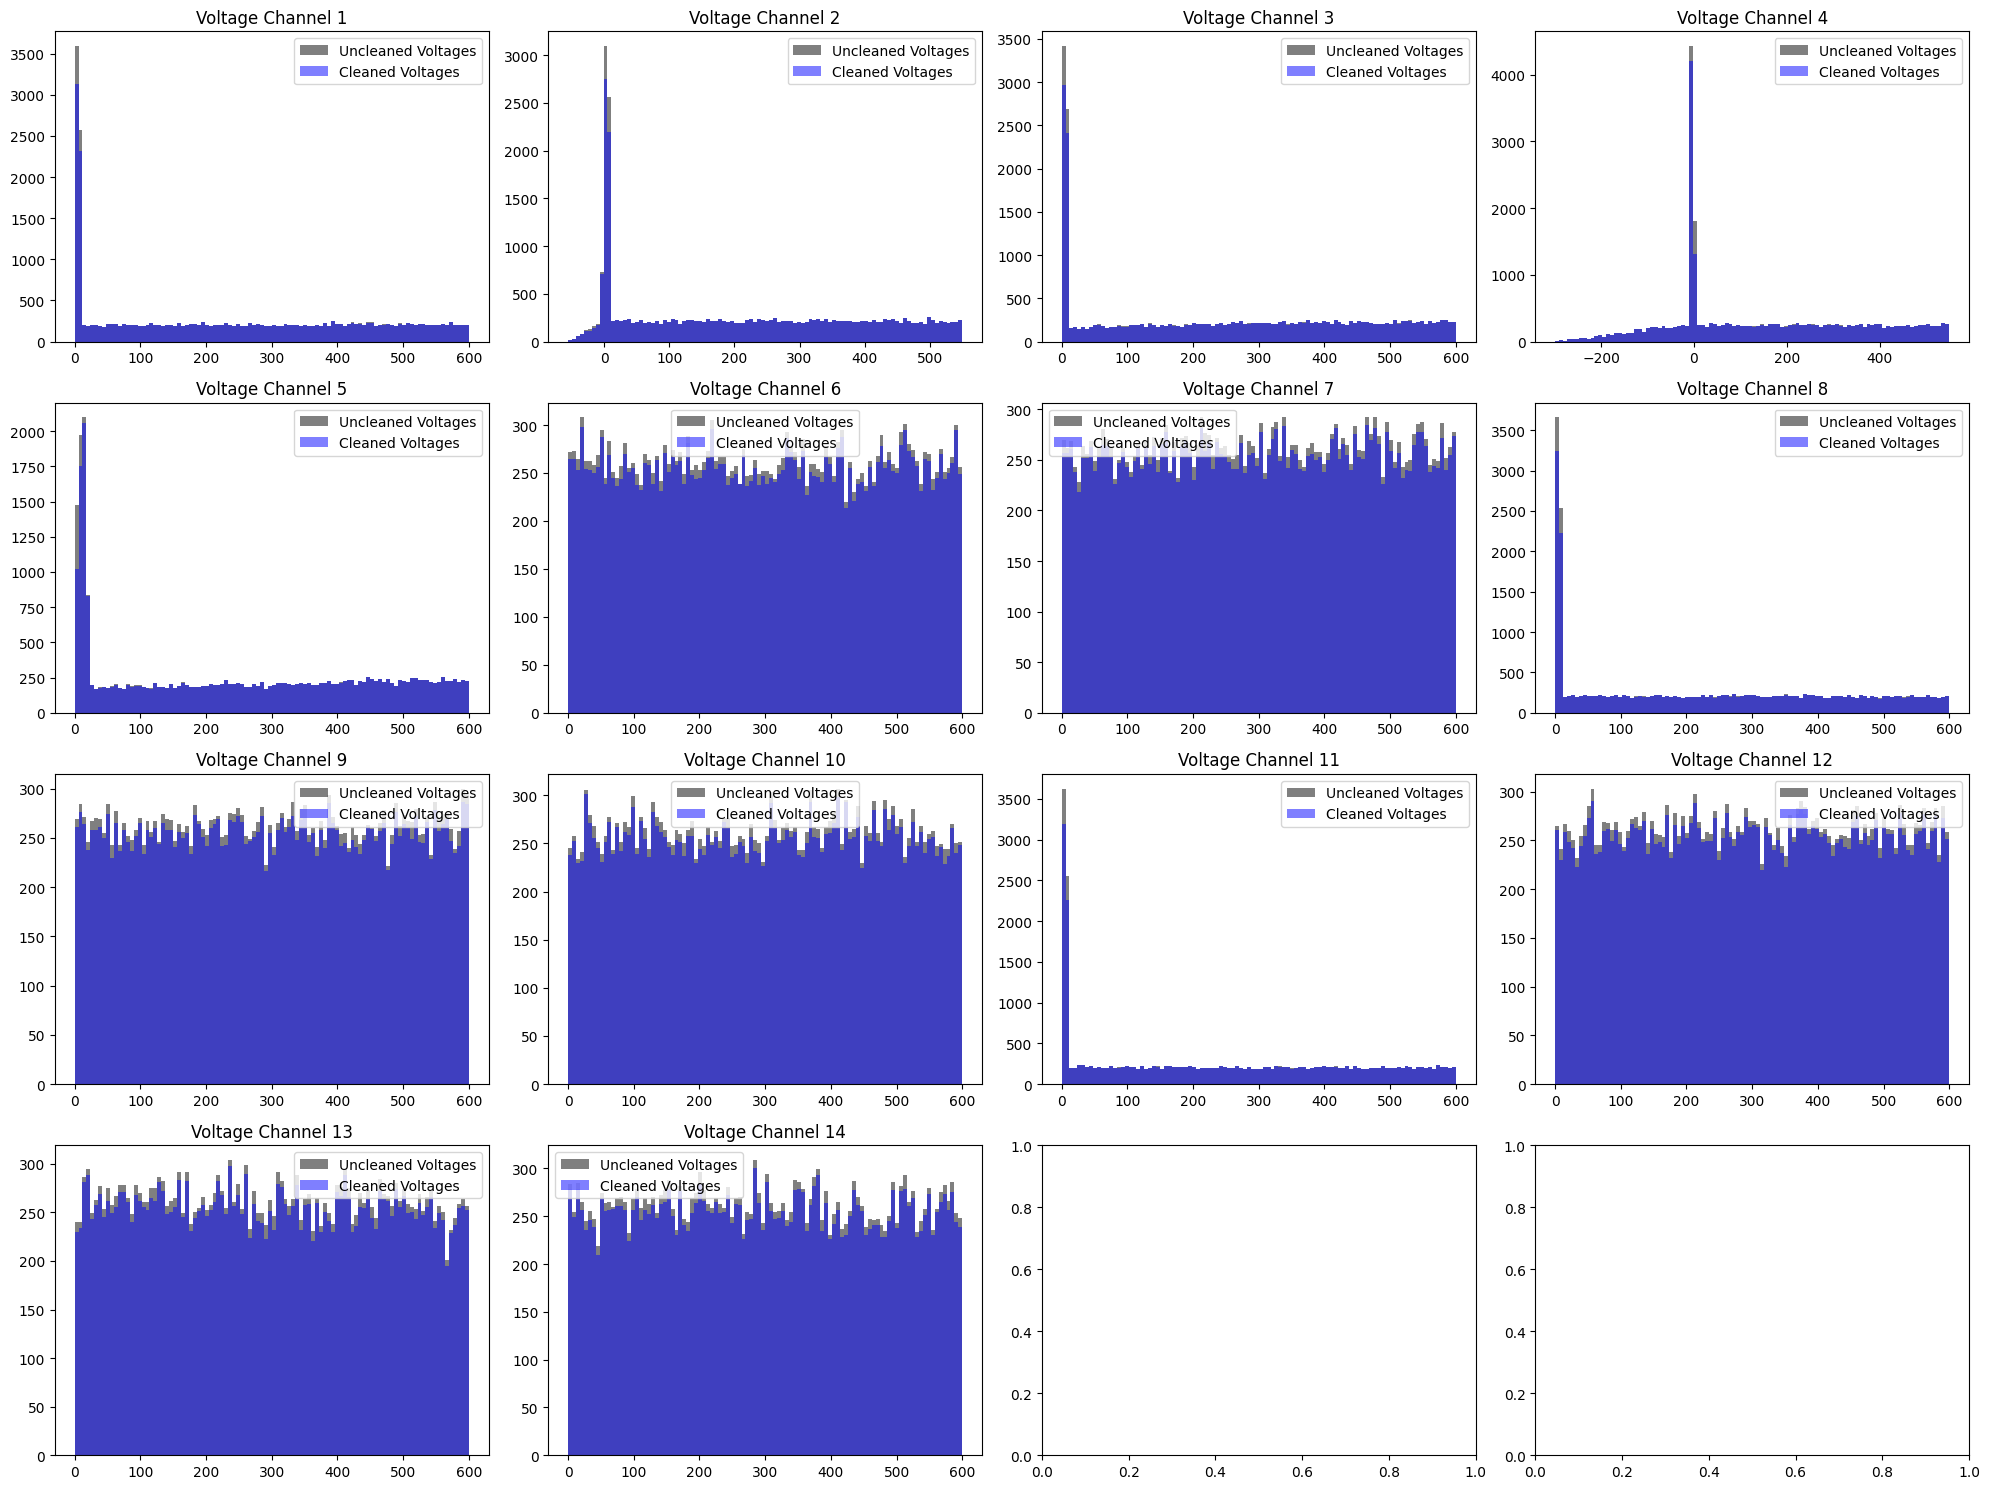

In [39]:
threshold = 4
trim_mode = 'iqr'
_,ax,_,_,_,_=trim_scatter(["test_model_data.csv","parallel_test_model_data.csv",'outlier_target_model_data.csv'], output_values_start=14, output_values_end=15,trim_mode=trim_mode,trim_threshold=threshold,subplot_shape=(1,3),figsize=(20, 5))
# ax[0].set_xlim(0, 100)
# ax[0].set_ylim(-5, 5)
_,_,_,_,fig,ax=trim_hist(['test_model_data.csv','parallel_test_model_data.csv','outlier_target_model_data.csv'], output_values_start=14, output_values_end=15,trim_mode=trim_mode,trim_threshold=threshold,subplot_shape=(4,4))


Using device: mps
Training model...
Epoch 0: Train Loss = 0.120105, Val Loss = 0.016159
Training completed. Best validation loss: 0.007788


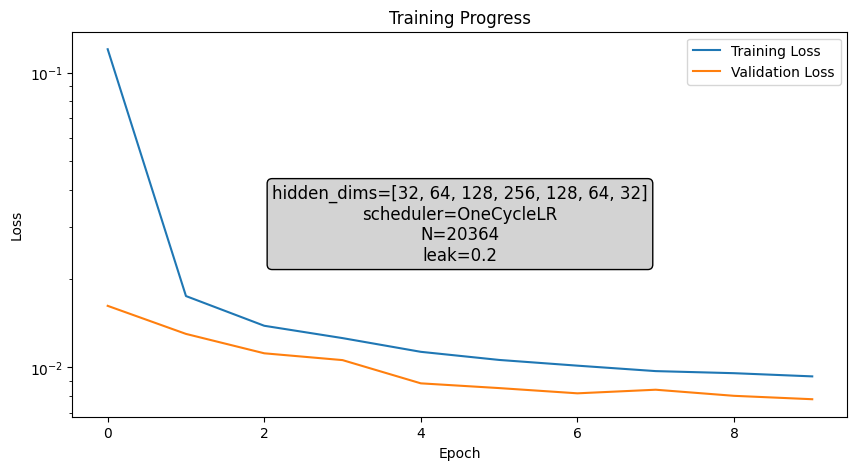

In [41]:

n_voltages = 14     # Number of voltage parameters
n_output_values = 2 # Number of output values (e.g., magnification, aberration, etc.)
voltages, output_values =load_data(['parallel_test_model_data.csv','test_model_data.csv','outlier_target_model_data.csv'], output_values_start=14,trim_mode=trim_mode, output_values_end=15,trim_threshold=threshold)
# Create and train model
predictor1 = ElectronOpticsPredictor(input_dim=n_voltages, output_dim=n_output_values,leak=0.2)
print("Training model...")
predictor1.train(voltages, output_values, epochs=10, verbose=True,weight_name='best_model1.pth')


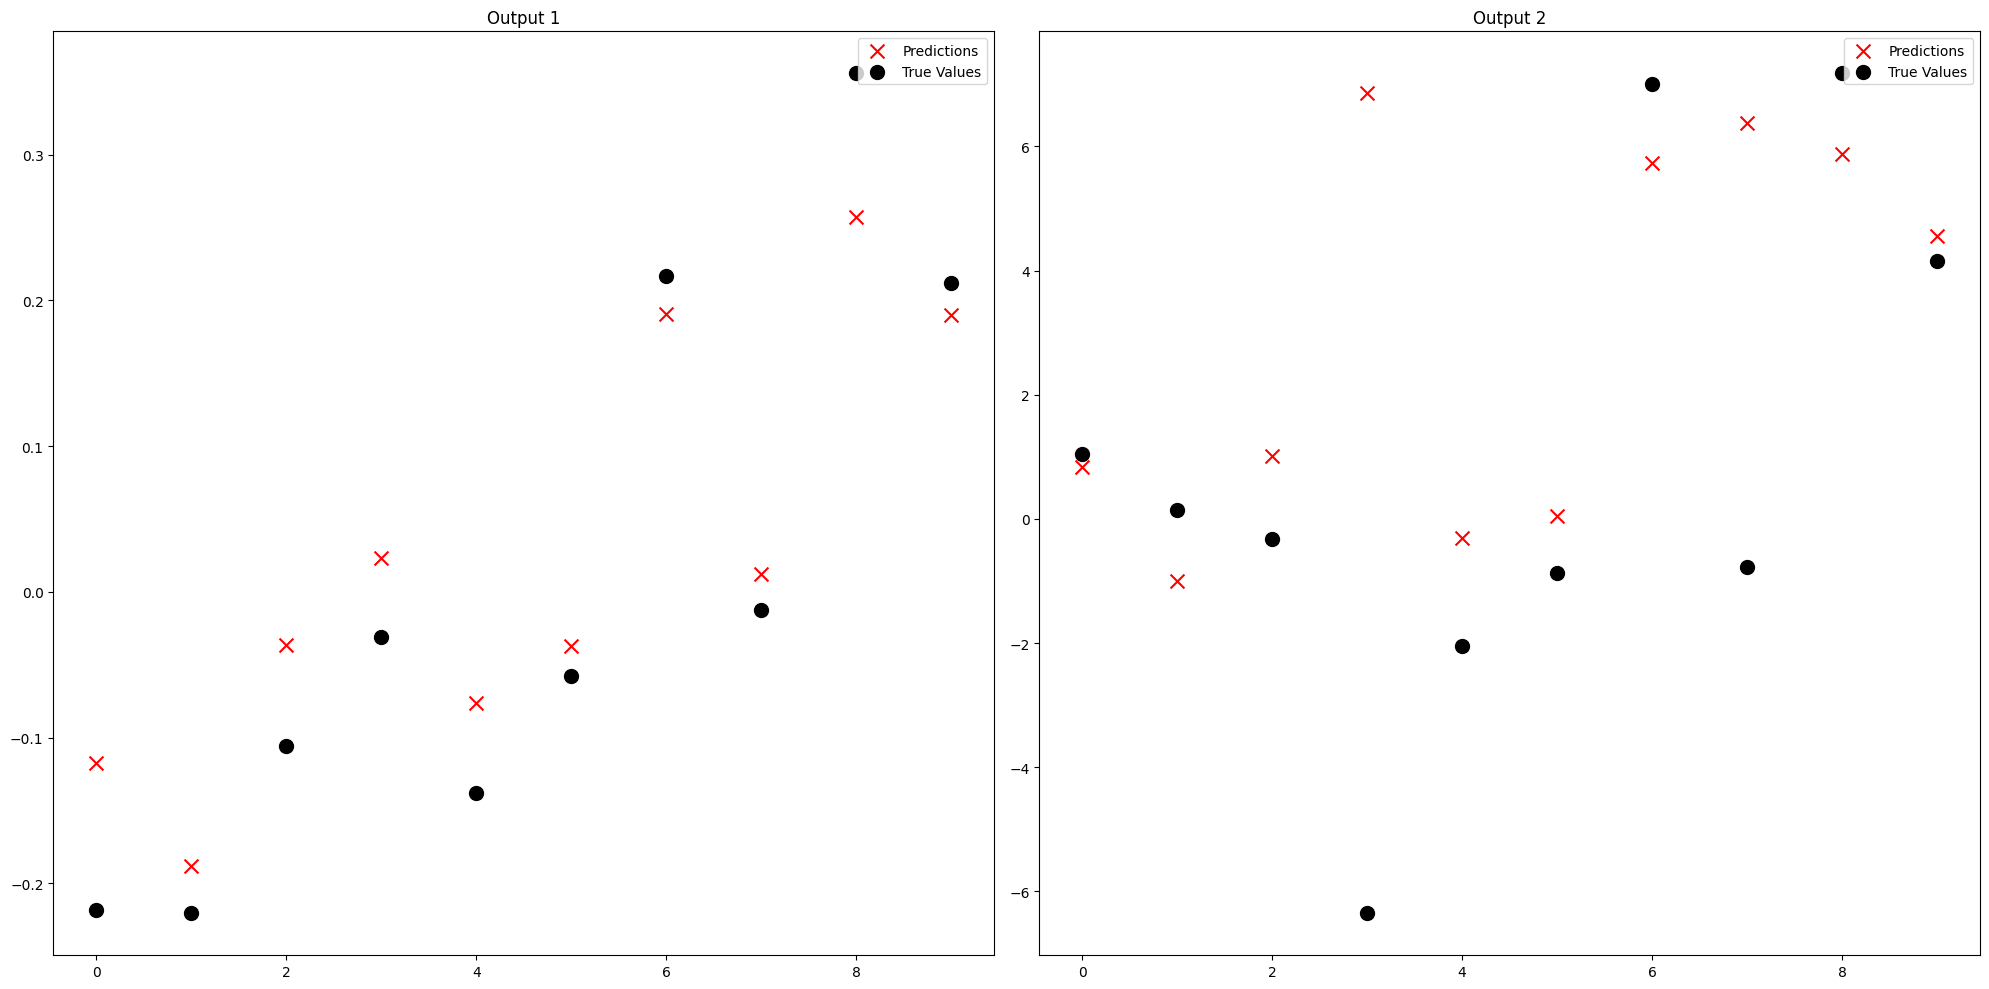

In [42]:
_,_,all_predictions, all_true_values =plot_inference_comparison(predictor1,n_samples=10,subplot_shape=(1,2))

cluster 2

52.3% of data retained after cleaning


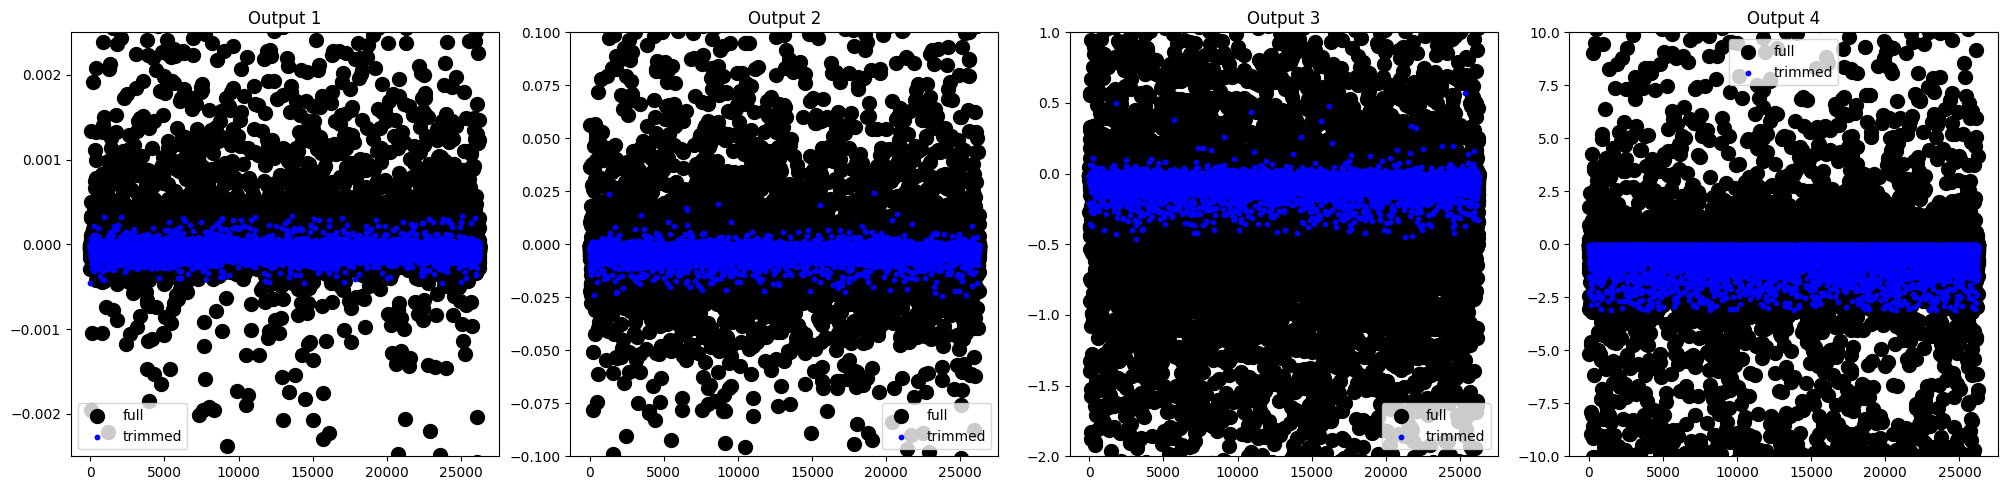

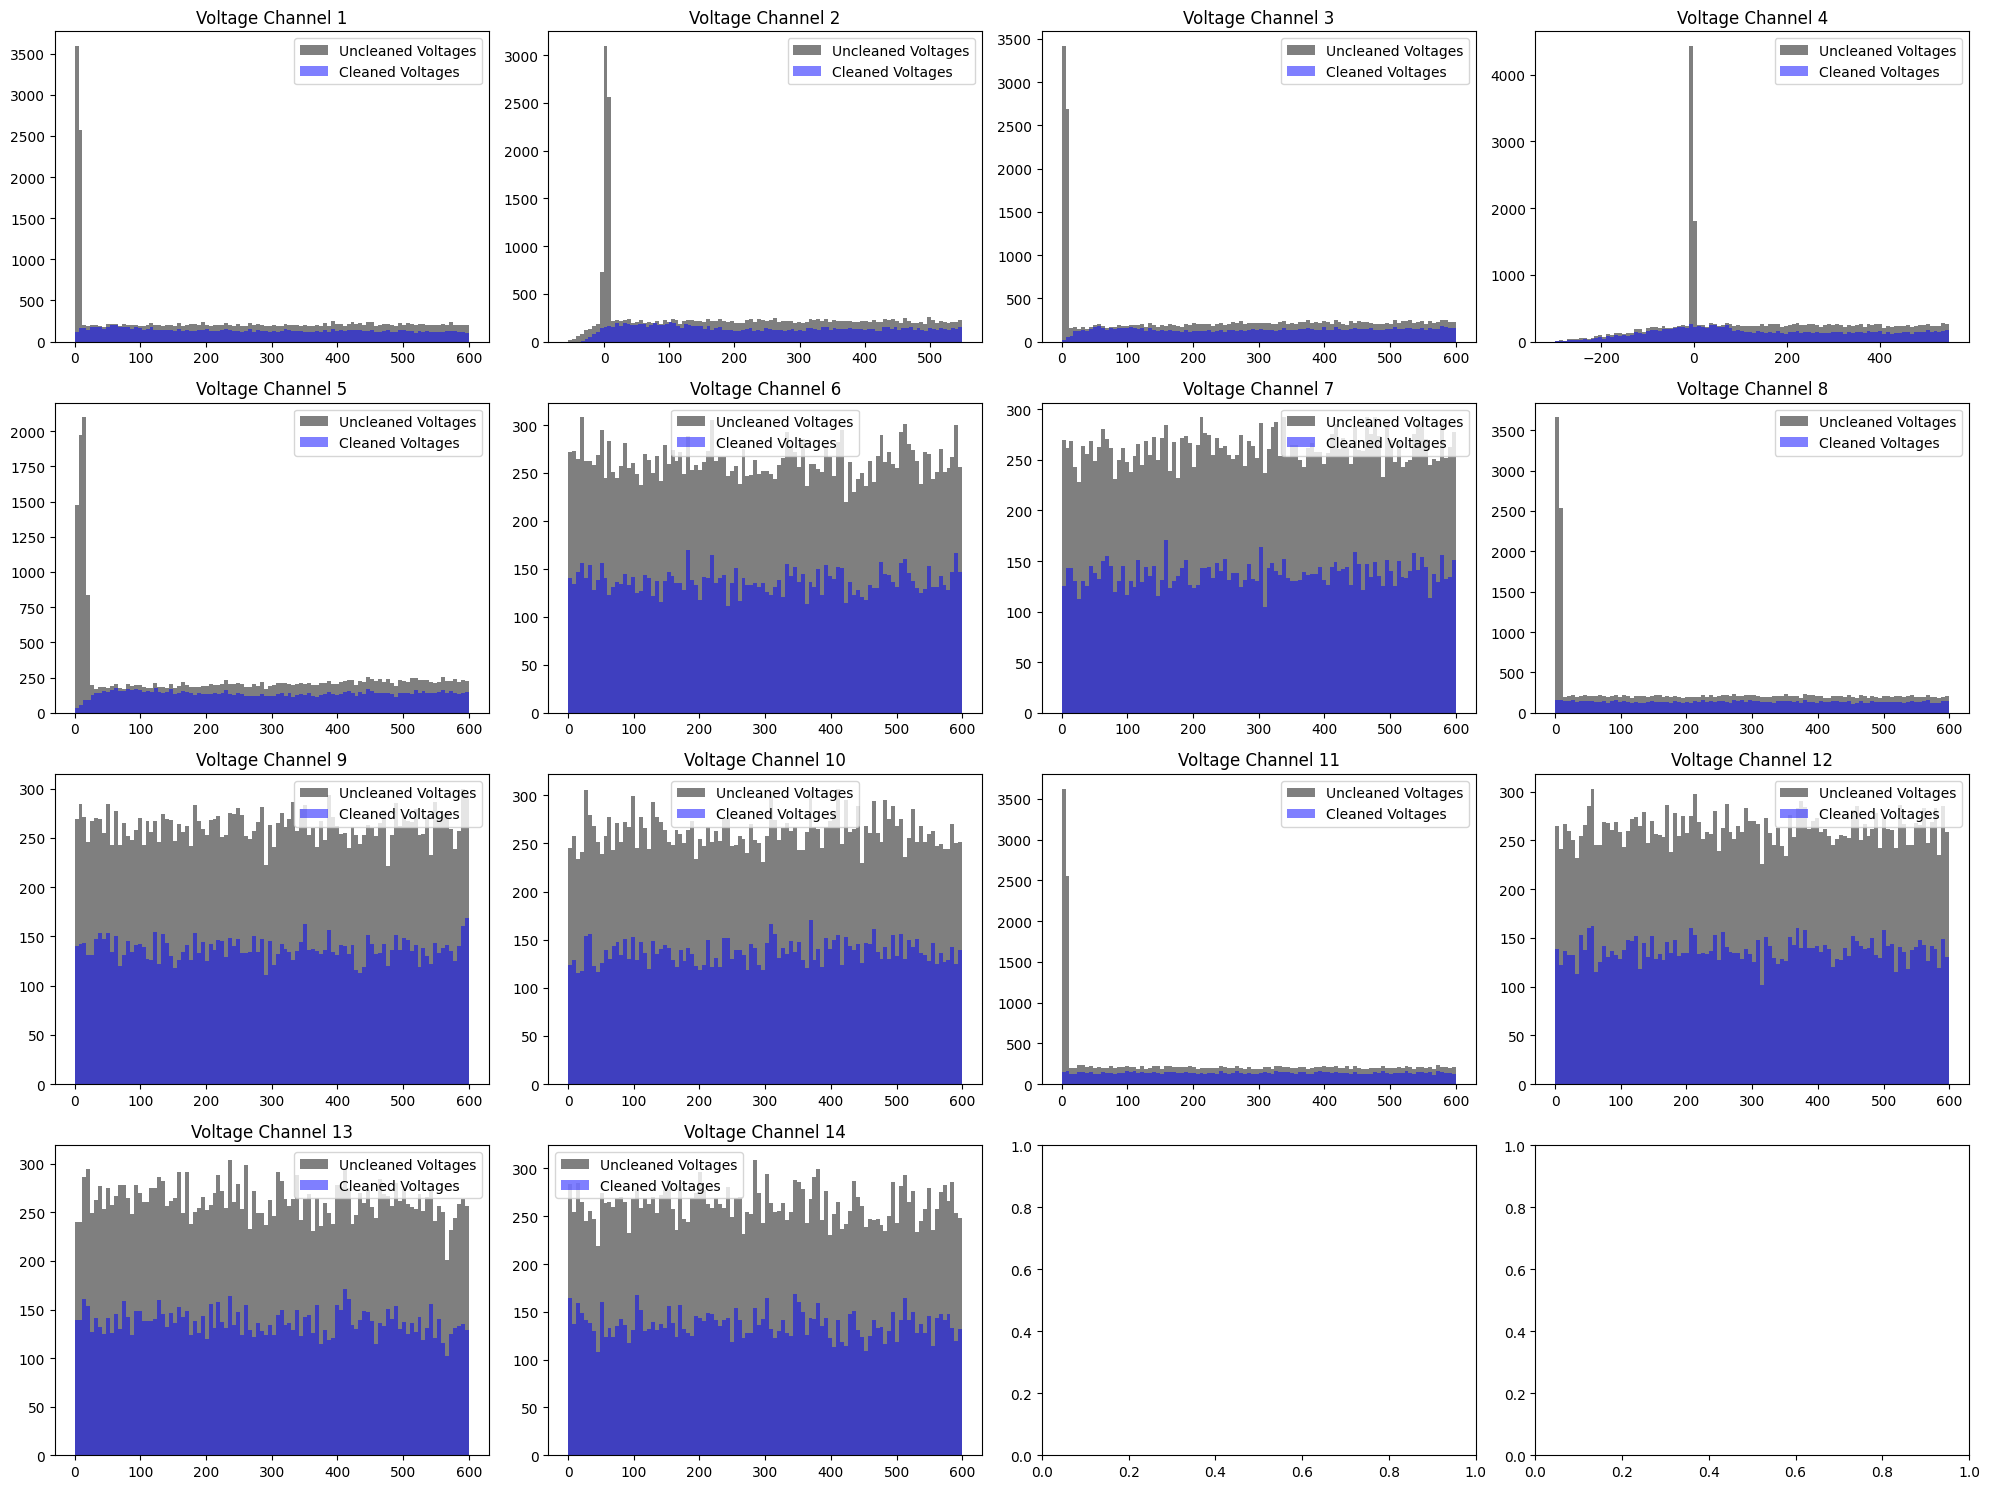

In [79]:
threshold = [10, 10, 10, 1] # Thresholds for each output value
trim_mode = 'iqr'
_,ax,_,_,_,_=trim_scatter(["test_model_data.csv","parallel_test_model_data.csv",'outlier_target_model_data.csv'], output_values_start=16, output_values_end=19,trim_threshold=threshold,trim_mode=trim_mode,subplot_shape=(1,4),figsize=(20, 5))
# ax[0].set_xlim(0, 100)

ax[0].set_ylim(-0.0025, 0.0025)
ax[1].set_ylim(-0.1, 0.1)
ax[2].set_ylim(-2, 1)
ax[3].set_ylim(-10, 10)

_,_,_,_,fig,ax=trim_hist(['test_model_data.csv','parallel_test_model_data.csv','outlier_target_model_data.csv'], output_values_start=16, output_values_end=19,trim_threshold=threshold,trim_mode=trim_mode,subplot_shape=(4,4))


Using device: mps
Training model...
Epoch 0: Train Loss = 0.393712, Val Loss = 0.110669
Training completed. Best validation loss: 0.002543


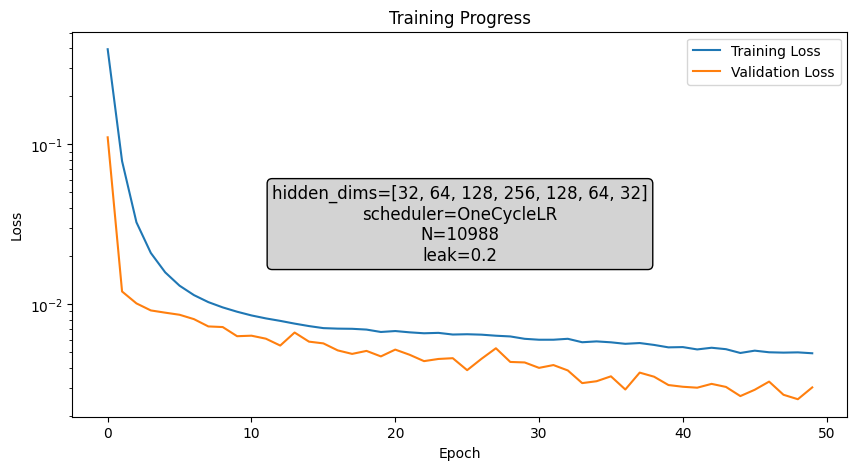

In [80]:

n_voltages = 14     # Number of voltage parameters
n_output_values = 4 # Number of output values (e.g., magnification, aberration, etc.)
voltages, output_values =load_data(['parallel_test_model_data.csv','test_model_data.csv','outlier_target_model_data.csv'], output_values_start=16, output_values_end=19,trim_threshold=threshold,trim_mode=trim_mode)
# Create and train model
predictor2 = ElectronOpticsPredictor(input_dim=n_voltages, output_dim=n_output_values,leak=0.2)
print("Training model...")
predictor2.train(voltages, output_values, epochs=50, verbose=True,weight_name='best_model2.pth')


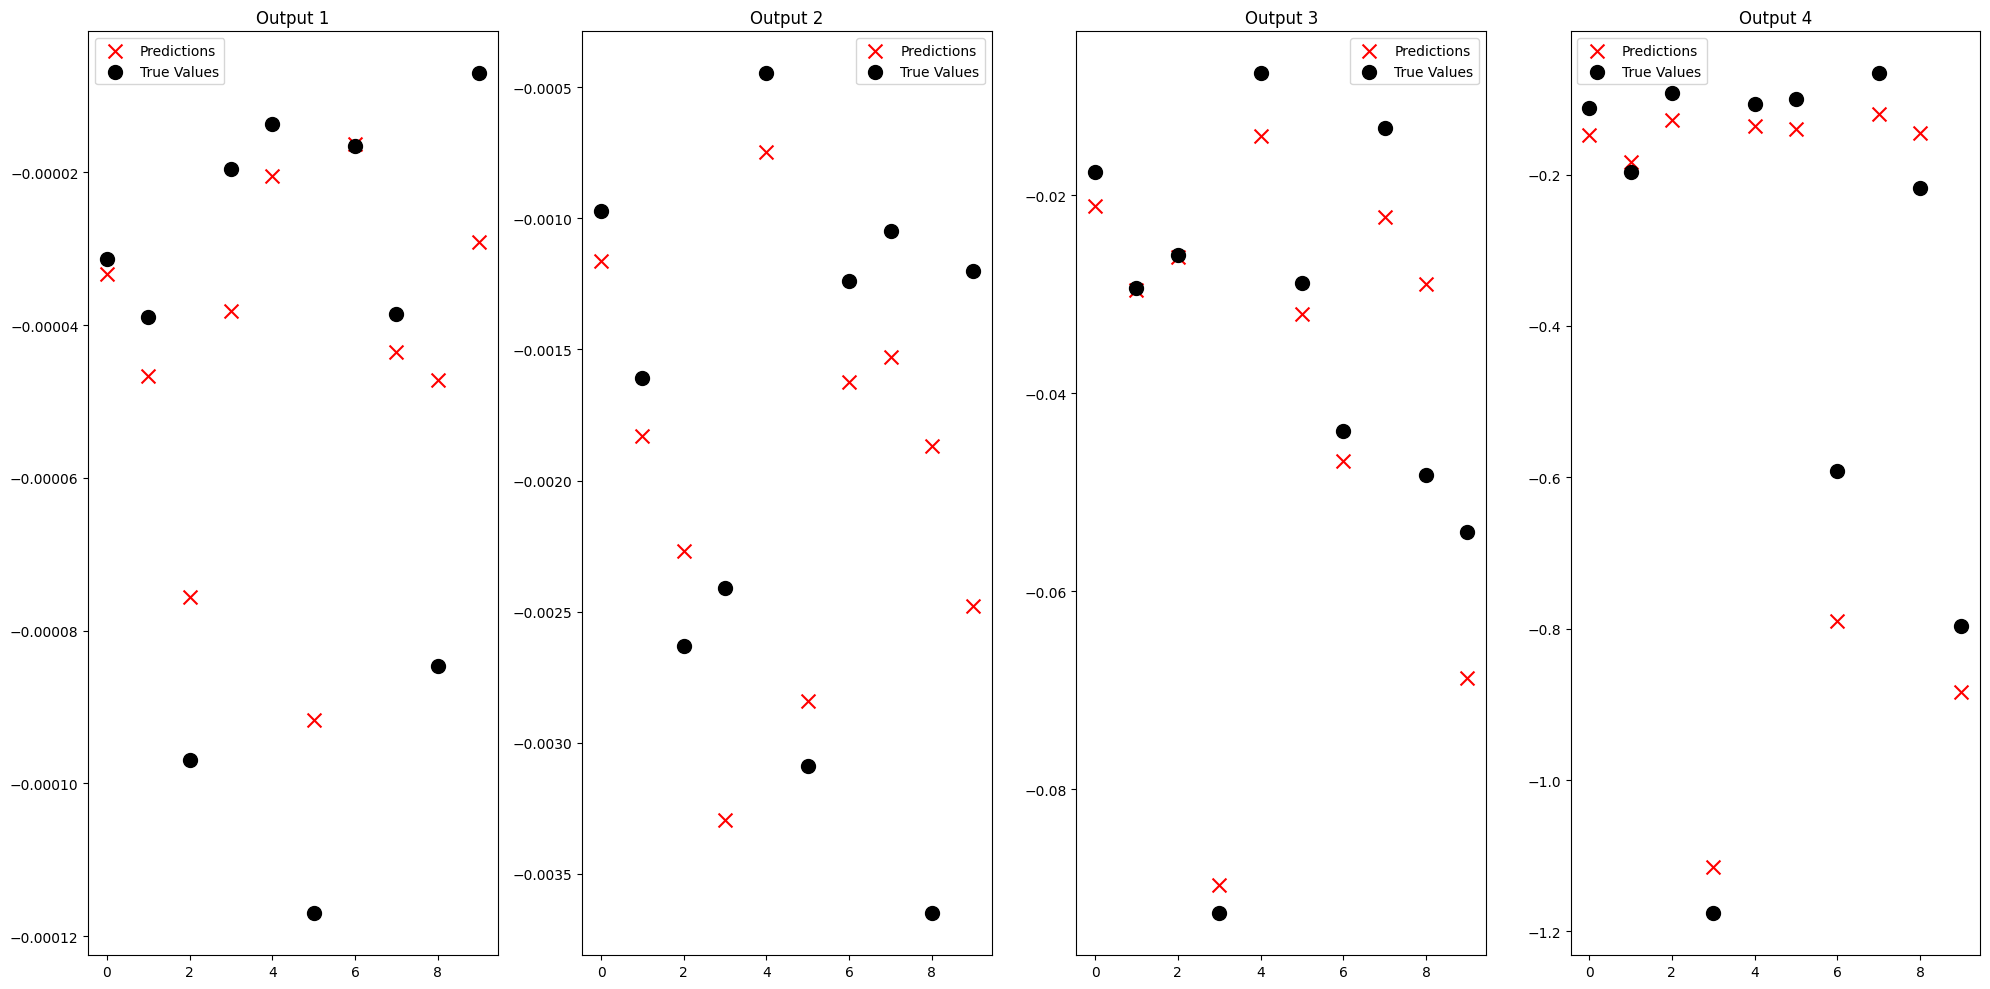

In [81]:
_,_,all_predictions, all_true_values =plot_inference_comparison(predictor2,n_samples=10,subplot_shape=(1,4))

Cluster 3

91.2% of data retained after cleaning


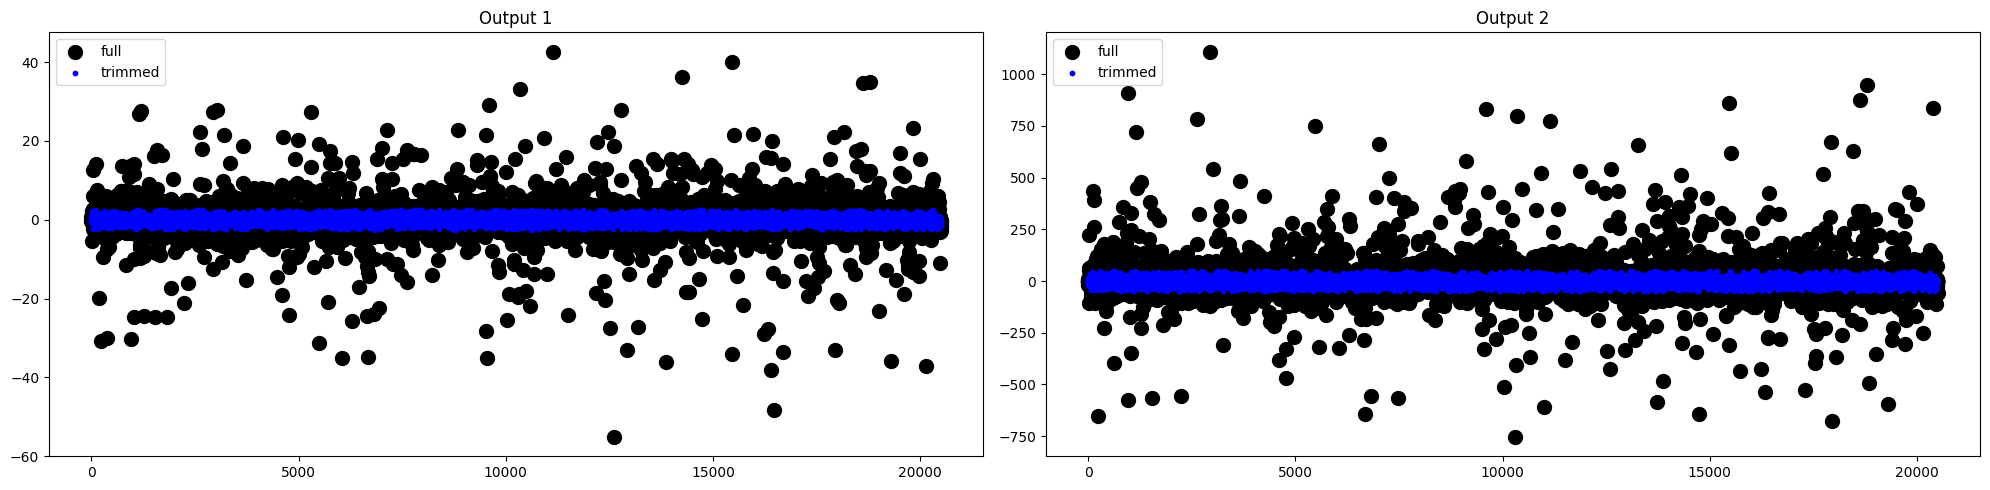

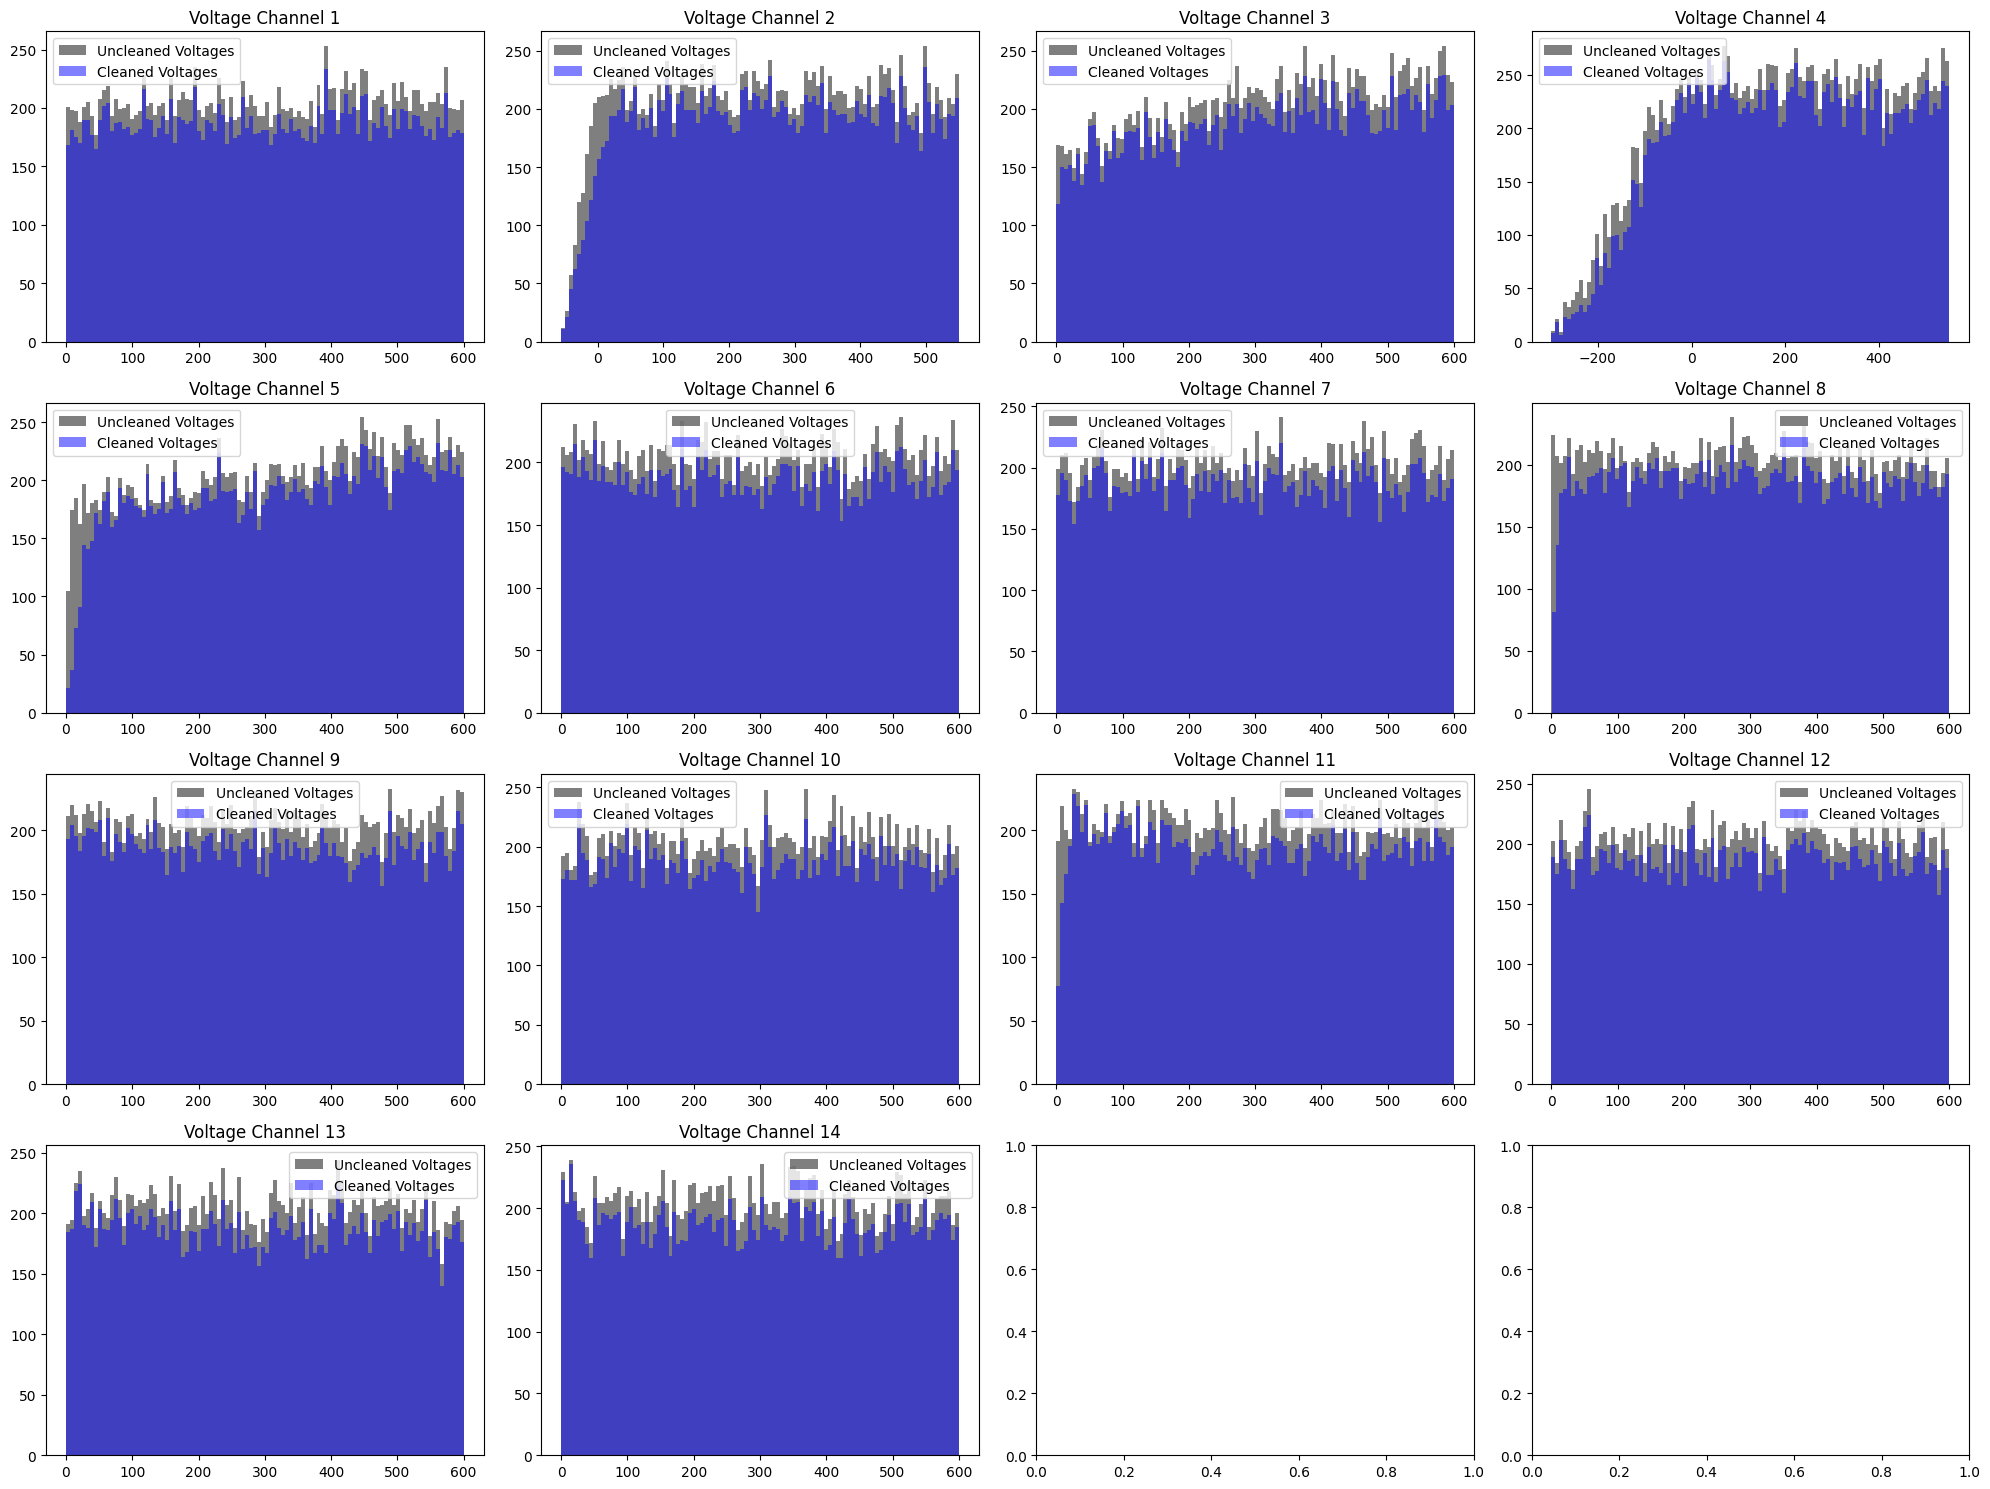

In [ ]:
threshold = 1
_,ax,_,_,_,_=trim_scatter(["test_model_data.csv","parallel_test_model_data.csv"], output_values_start=20, output_values_end=21,trim_threshold=threshold,subplot_shape=(1,2),figsize=(20, 5))
# ax[0].set_xlim(0, 100)


_,_,_,_,fig,ax=trim_hist(['test_model_data.csv','parallel_test_model_data.csv'], output_values_start=20, output_values_end=21,trim_threshold=threshold,subplot_shape=(4,4))


Using device: mps
Training model...
Epoch 0: Train Loss = 0.203051, Val Loss = 0.018732
Training completed. Best validation loss: 0.016962


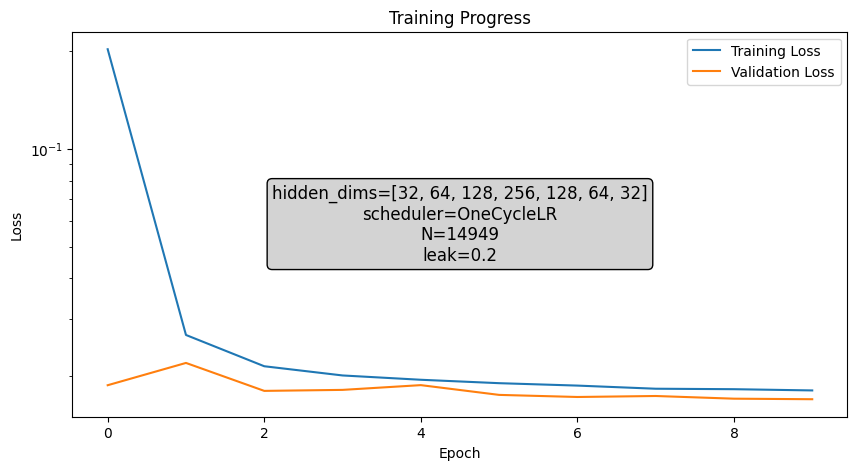

In [ ]:

n_voltages = 14     # Number of voltage parameters
n_output_values = 2 # Number of output values (e.g., magnification, aberration, etc.)
voltages, output_values =load_data(['parallel_test_model_data.csv','test_model_data.csv'], output_values_start=20, output_values_end=21,trim_threshold=threshold)
# Create and train model
predictor3 = ElectronOpticsPredictor(input_dim=n_voltages, output_dim=n_output_values,leak=0.2)
print("Training model...")
predictor3.train(voltages, output_values, epochs=10, verbose=True,weight_name='best_model3.pth')


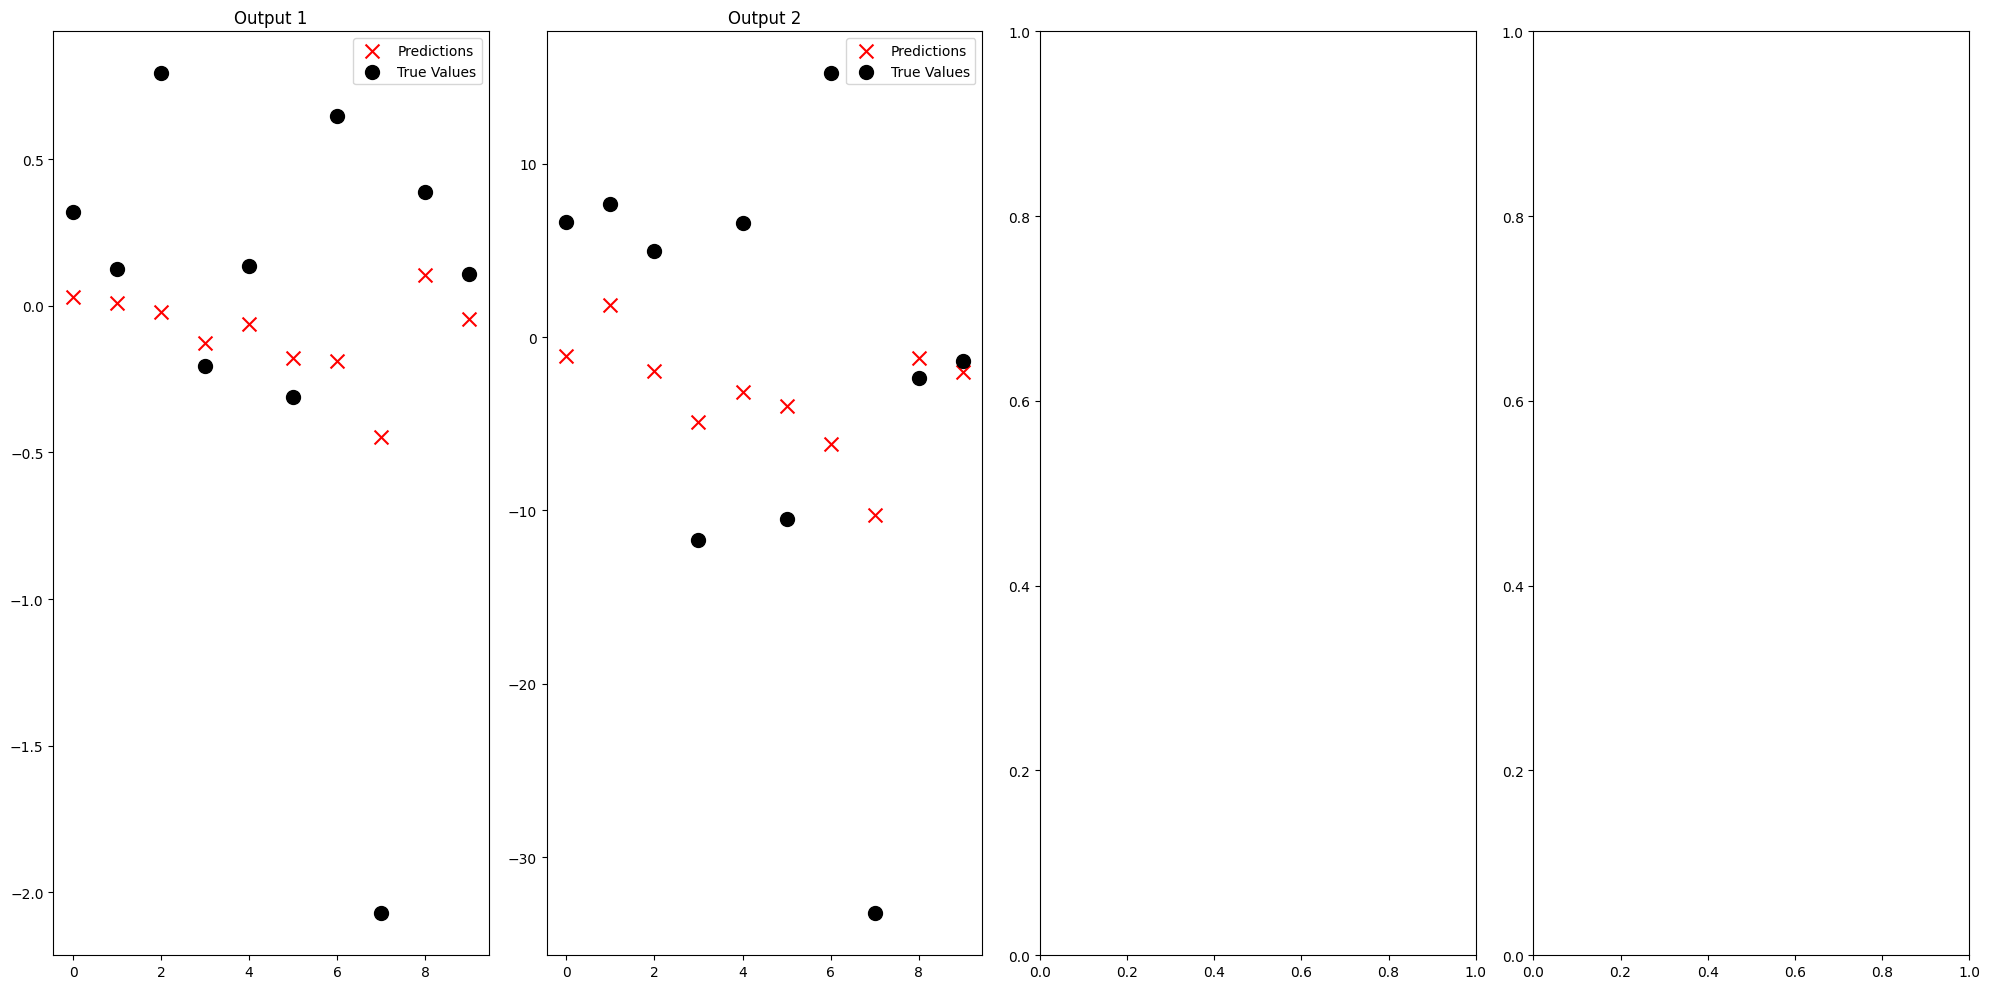

In [ ]:
_,_,all_predictions, all_true_values =plot_inference_comparison(predictor3,n_samples=10,subplot_shape=(1,4))

Cluster 4

87.5% of data retained after cleaning


(-0.2, 0.2)

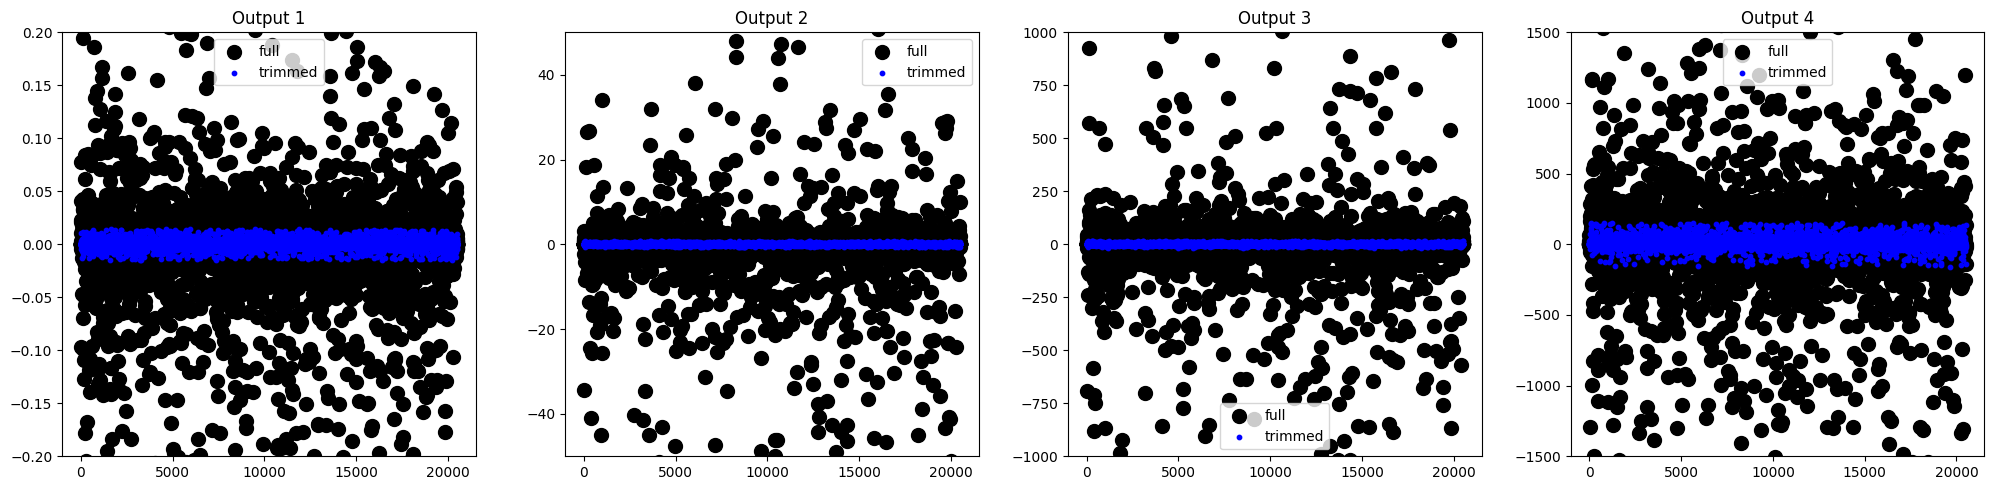

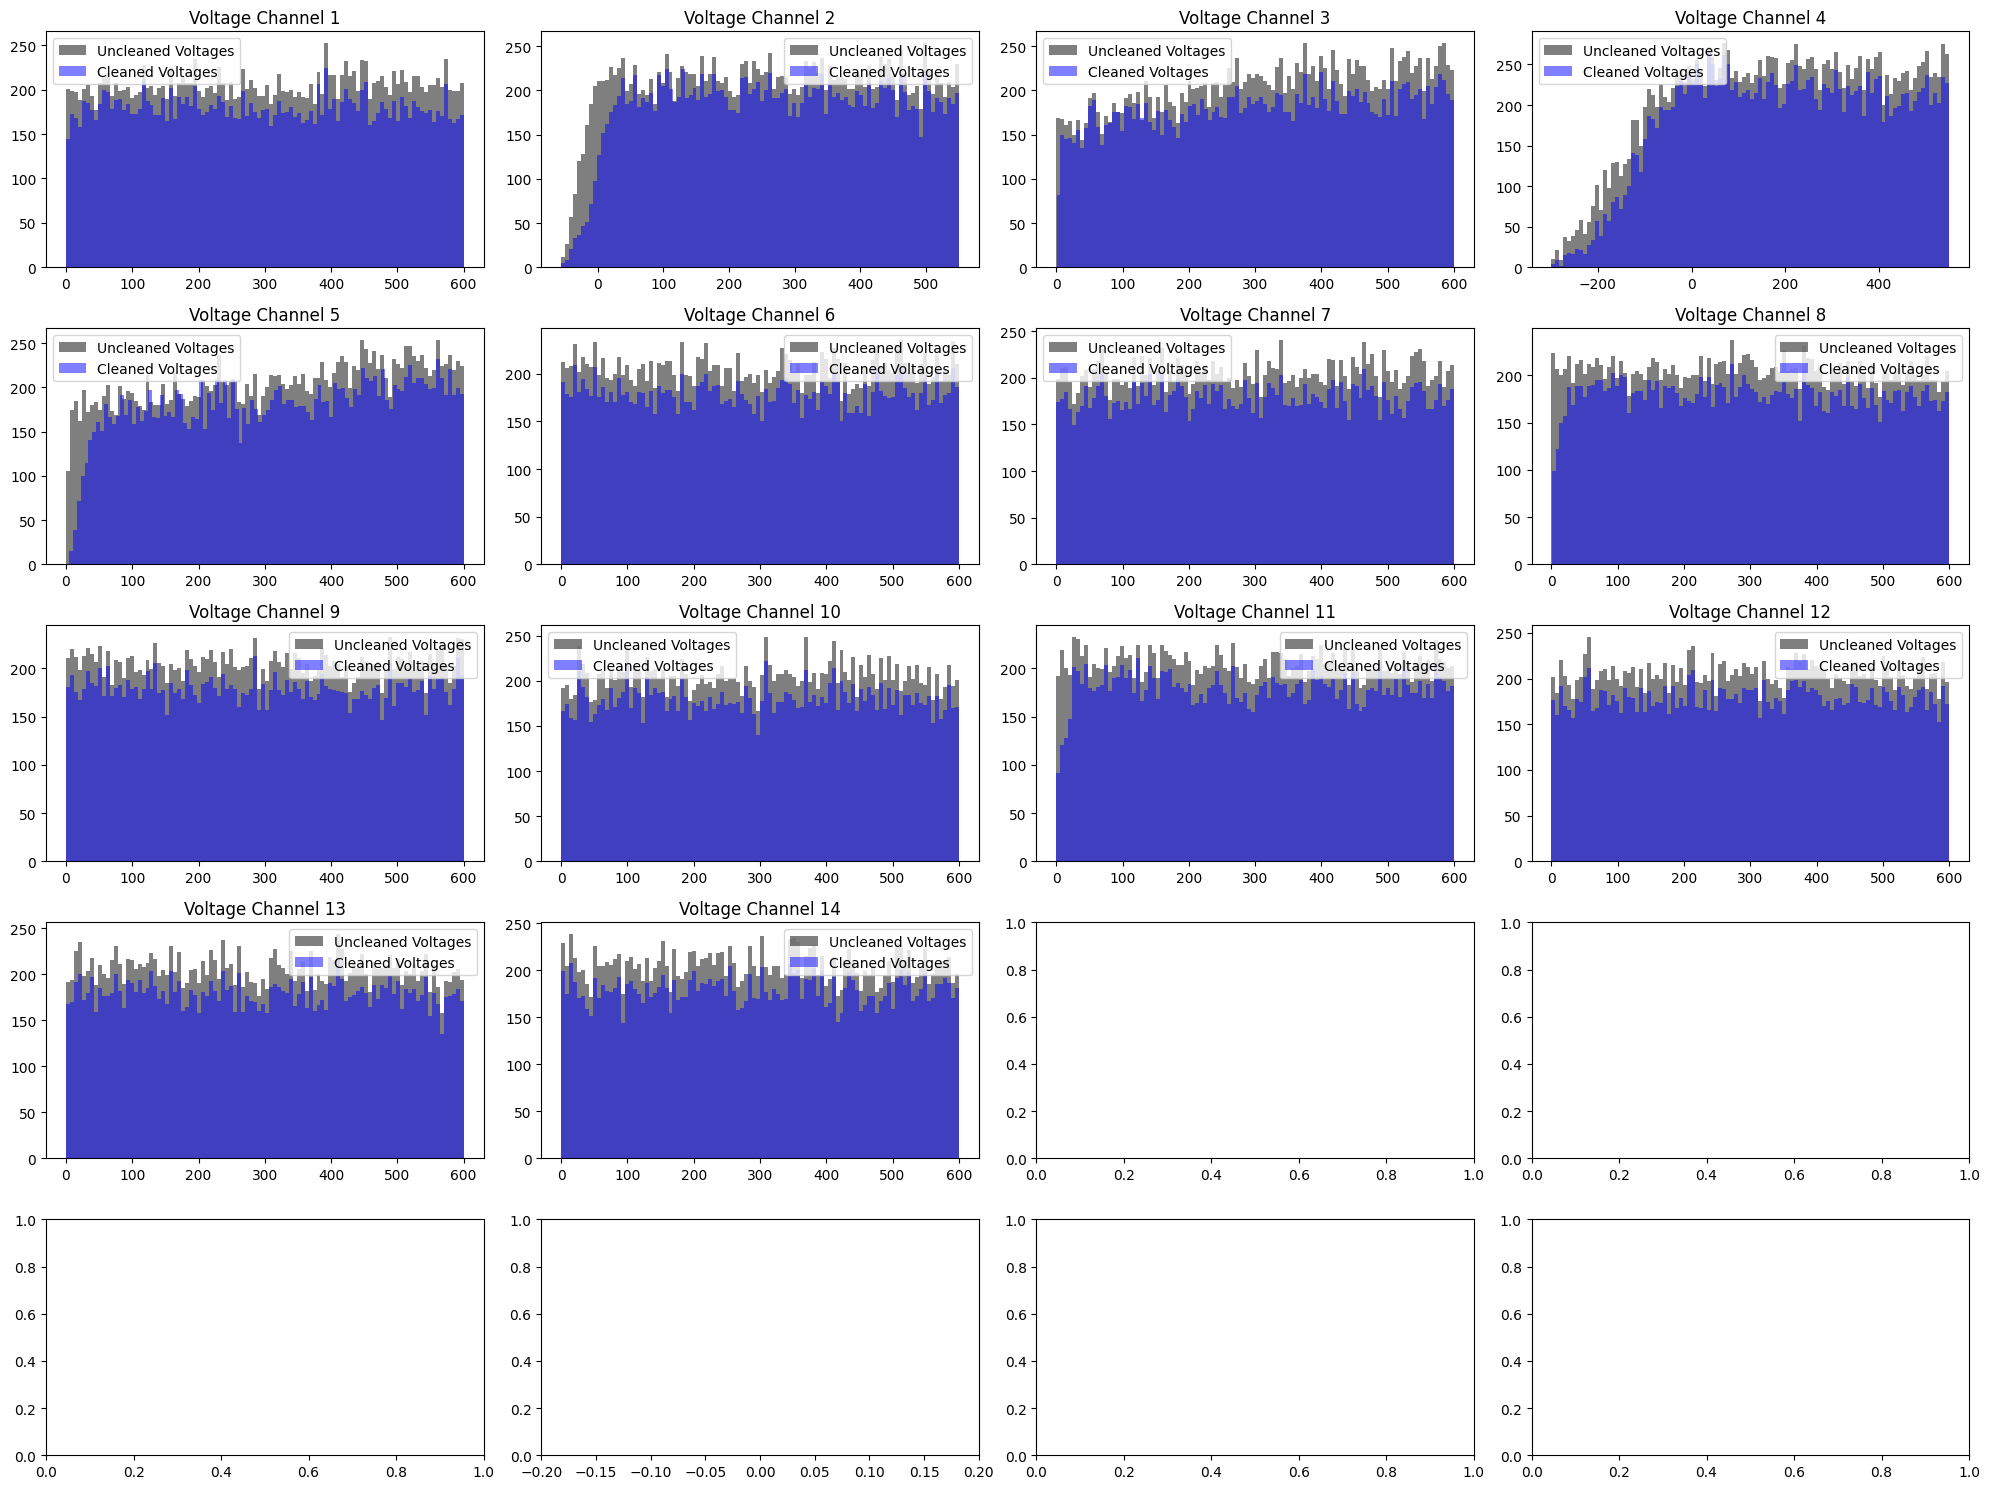

In [ ]:
threshold = 20
_,ax,_, output_values,_,_=trim_scatter(["test_model_data.csv","parallel_test_model_data.csv"], output_values_start=22, output_values_end=25,trim_mode='iqr',trim_threshold=threshold,subplot_shape=(1,4),figsize=(20, 5))
# ax[0].set_xlim(0, 100)
ax[0].set_ylim(-0.2, 0.2)
ax[1].set_ylim(-50, 50)
ax[2].set_ylim(-1000, 1000)
ax[3].set_ylim(-1500, 1500)


fig,ax, voltages_unclean, output_values_unclean, voltages, output_values=trim_hist(['test_model_data.csv','parallel_test_model_data.csv'], output_values_start=22, output_values_end=25,trim_mode='iqr',trim_threshold=threshold,subplot_shape=(5,4),hist_bins=100)

# ax[-1].scatter(np.arange(len(output_values)), output_values[:, 0])
ax[-3].set_xlim(-0.2, 0.2)


Using device: mps
Training model...
Epoch 0: Train Loss = 0.259914, Val Loss = 0.035884
Training completed. Best validation loss: 0.003778


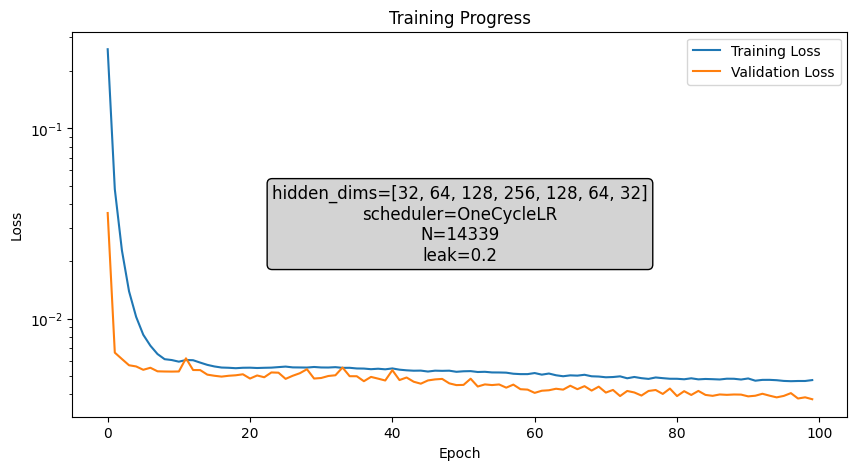

In [ ]:

n_voltages = 14     # Number of voltage parameters
n_output_values = 4 # Number of output values (e.g., magnification, aberration, etc.)
voltages, output_values =load_data(['parallel_test_model_data.csv','test_model_data.csv'], output_values_start=22,output_values_end=25,trim_mode='iqr',trim_threshold=threshold)
# Create and train model
predictor4 = ElectronOpticsPredictor(input_dim=n_voltages, output_dim=n_output_values,leak=0.2)
print("Training model...")
predictor4.train(voltages, output_values, epochs=10, verbose=True,weight_name='best_model4.pth')


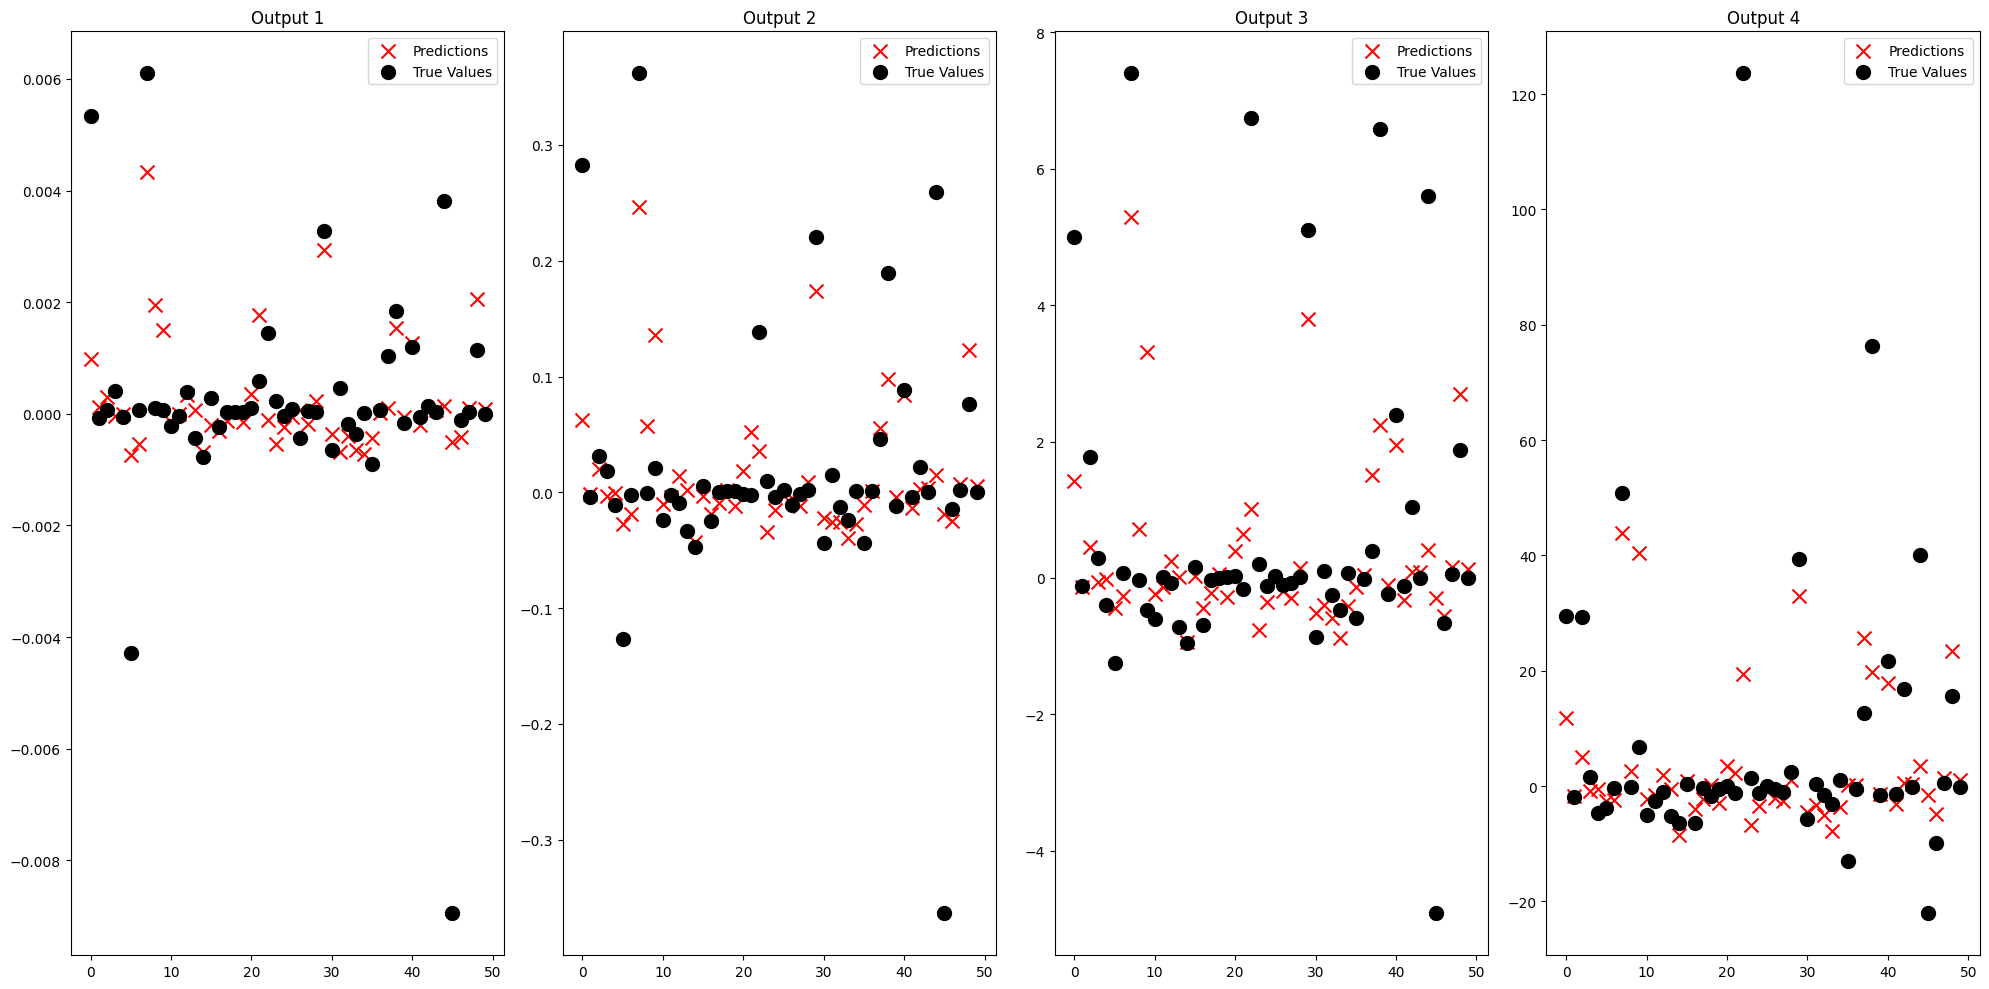

In [ ]:
_,_,all_predictions, all_true_values =plot_inference_comparison(predictor4,n_samples=50,subplot_shape=(1,4),)

In [ ]:
best_voltages, best_values, best_objective=optimize_voltages([predictor1, predictor2, predictor3, predictor4], custom_objective,random_restarts= 1)
# best voltages for good metric, output values of the best voltages, and the metric value

In [ ]:
best_voltages,best_objective

(array([ 471.30392  ,  115.78974  ,  545.29987  , -230.88676  ,
         235.4246   ,   81.780556 ,   54.513203 ,  141.95384  ,
         339.74896  ,  192.92558  ,    5.3745346,   91.97542  ,
         519.8145   ,  143.05708  ], dtype=float32),
 250005.640625)

In [ ]:
custom_objective(best_voltages)


1028032.3327891594